# Applied Machine Intelligence - Group 10
### Data Preprocessing
This notebook takes in data on greenhouse gas emissions and its indicators and preprocess them for later use. It was created using Google Colab.

All preprocessed files will be stored in a container called `database` and exported as a JSON file.
Inside the container we have the following elements: `sector`, `category`, `yearly_data` and `data`. `data` is a Pandas DataFrame for one feature with timestamps and values.

The JSON file will then be the input for all further steps of the data proccesing pipeline.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns 
import json
import datetime
import matplotlib.pyplot as plt

In [2]:
# Create database
database = {}


In [3]:
# Plotting function 
# ticks_spacing: specify the distance between the x ticks (default 1)
# max_ticks: specify the maximum number of x ticks (defaul 31)
def plot_data(timeseries, feature_name, ticks_spacing = 1, max_ticks = 31):

  x_values = timeseries.index
  y_values = timeseries.iloc[:,0]
  
  plt.figure(figsize=(18, 6))
  ax = sns.pointplot(x=x_values, y=y_values)
  plt.xticks(rotation=90)
  plt.xlabel('time scope')
  plt.title('Plot feature: ' + feature_name)
  plt.grid()

  #change xticks labels 
  if ticks_spacing != 1:
    ticks = ax.get_xticklabels()
    for label in ax.get_xticklabels()[::1]:
        label.set_visible(False)
    for label in ticks[::ticks_spacing]:
        label.set_visible(True) 
  else:
    if len(x_values) > max_ticks:
        ticks_spacing = int(len(x_values)/max_ticks)
    ticks = ax.get_xticklabels()
    for label in ax.get_xticklabels()[::1]:
        label.set_visible(False)
    for label in ticks[::ticks_spacing]:
        label.set_visible(True)
          
  plt.show()

# Mobility




## Vehicle traffic
Different data sources are taken into account and proposed to help modeling the CO2 emissions of the vehicle traffic sector. How this data is proposed to be merged is explained step by step in the regarding data sections.

### BAST Traffic Count data Germany
**Overview of the data:**\
Timespan: 2003 until 2018\
Frequency: monthly \
Number of samples: 192\
Features: 1

**Why did we choose the data source and how it might help us:**\
Bundesanstalt für Straßenwesen (BAST) collects the data of the traffic count stations of the individual states (Bundesländer) and summarizes it in one central database. These traffic count data represent the traffic utilization in Germany and mostly covers the street type A and B.\
Following link leads to a map that shows Germany with the marked BAST stations. It can be seen that the stations are well distrubuted over the area of Germany. [Map BAST stations Germany](https://tumde-my.sharepoint.com/:b:/g/personal/johannes_gensheimer_tum_de/EdDBb-siKZZIvjM8kKd5olIBrPItB3HQSb1ywU1tE6uhyA?e=5wtxzx) \
The dataset well covers the traffic development of whole Germany in a time series. Seasonal development of one year but also of the year to year timeseries can be extracted and used as an indicator to model the traffic related greenhouse gas emissions of Germany. 

Dataprocessing notebook: M_BuildBASTDataset.ipynb \
The hourly data of all stations is downloaded by a webcrawler and processed to daily and monthly sums of each traffic count station. This value represents the total number of vehicles passing the counting station in that month. Of all available stations in one month the average is taken which represents the average total number of vehicles per traffic counting station in the corresponding month. This value is independent by the number of counting stations and therefore enables a comparable timeseries.

**Limitations:**\
Data is only available until 2018 and only for street type A and B. Therefore it does not directly covers urban areas.

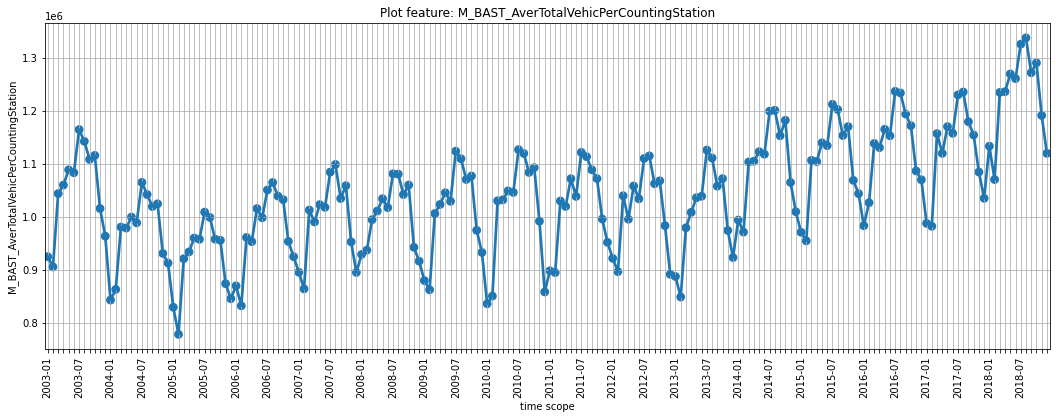

In [4]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/BAST_CountingStations_Feature_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        #timeseries.date = pd.to_datetime(df.date).dt.to_period('m')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()

        plot_data(timeseries, i)

### BAYSIS Traffic Count data
**Overview of the data:**\
Timespan: February 2017 until April 2020\
Number of samples: 39\
Features: 1

**Why did we choose the data source and how it might help us:**\
The traffic count stations of BAYSIS (Bayerisches Staatsministerium für Wohnen, Bau und Verkehr) are also included in the BAST traffic count database, but much more recent data is available on the BAYSIS website. But the BAYSIS data back to 2003 can be extracted from the BAST dataset which is explained in the next section. \
Following link leads to a map which show the gridded traffic counting stations in Bavaria [Map BASIS stations Germany](https://tumde-my.sharepoint.com/:b:/g/personal/johannes_gensheimer_tum_de/EdUoyfWh8GtLi3qA_hgaZjgBUpgirz1mRd0ZUiAI5OKQLw?e=klBvtc). With the resent data of Bavaria the traffic of whole Germany can be modeled. How this is proposed is also covered in the next section "BAST traffic count data for Bavaria". 

Dataprocessing notebook: M_ProcessBaysisData.ipynb \
The data is available in daily averages of vehicles passing the counting station for each month. These values are weighted by the number of days of the corresponding month to get the total number of the vehicles passing the station in that month. Of all available traffic count stations in one month the average is taken which represents the average total number of vehicles per traffic counting station in the corresponding month. This value is independent by the number of counting stations and should extend the timespan of the BAST traffic count dataset. 

**Limitations:**\
Start of data availability is 2017. Before that date only yearly data and quarter yearly data is available. The dataset only represents traffic count data for the stations in Bavaria.

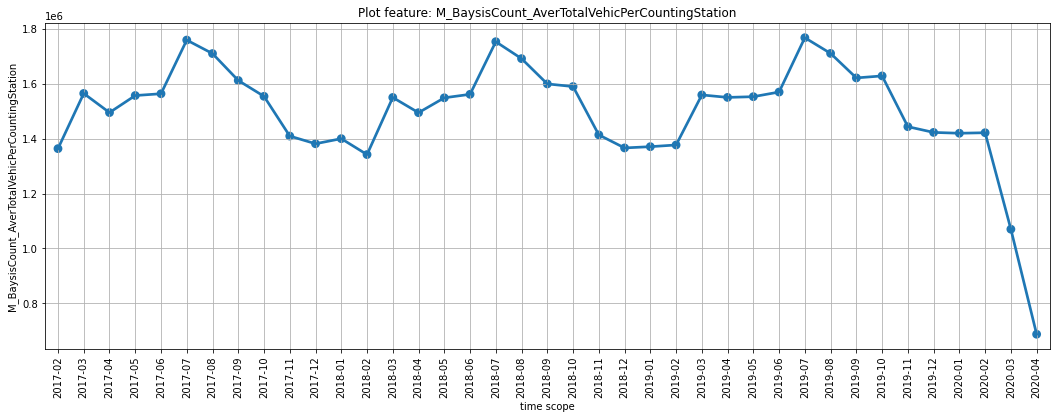

In [5]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/Baysis_CountingStations_Feature_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

### BAST Traffic Count data Bavaria
**Overview of the data:**\
Timespan: 2003 until 2018\
Frequency: monthly \
Number of samples: 192\
Features: 1

**Why did we choose the data source and how it might help us:**\
Bundesanstalt für Straßenwesen (BAST) collects the data of the traffic count stations of the individual states (Bundesländer) and summarizes them in one central database. These traffic count data represent the traffic utilization in Germany and mostly covers the street type A and B. It is only available until the year 2018 but data for Bavaria is available until April 2020 (BAYSIS dataset). As the bavarian stations are included in the BAST dataset they can be extracted and therefor the BAYSIS dataset, which only covers monthly values back to 2017, can be extended back to the year 2003. The relation of the traffic in Bavaria and the traffic in Germany for the years 2003 until 2018, which both datasets cover, can be used to model the traffic of Germany only using the traffic of Bavaria from the BAYSIS dataset. Following figure shows a scatter plot of the average total number of vehicles per traffic counting station in the corresponding month for Germany and Bavaria [Scatter plot](https://tumde-my.sharepoint.com/:i:/g/personal/johannes_gensheimer_tum_de/EUSAP_Lr7x1Hj-0MOPKVmI4B-G3_MGqothC_wpXjWpo4mw?e=2i9pNx). A very linear relationship between bavarian and german traffic can be seen and therefore it is possible to calculate german traffic based on bavarian traffic. For the time during the Corona lockdown the following mobility reports have to be used, because the relation between Bavarian and German traffic may differ, due to different regulations in the individual states. 

Dataprocessing notebook: M_ExtractBavariaFromBAST.ipynb \
The bavarian stations are extracted of the BAST dataset by identifying their station numbers with the BAYSIS dataset. Of all available stations in one month the average is taken which represents the average total number of vehicles per traffic counting station in the corresponding month. This value is independent by the number of counting stations and therefore enables a comparable timeseries. 

**Limitations:**\
Data is only avialable until 2018 and only for street type A and B and therefor not directly covers urban areas.

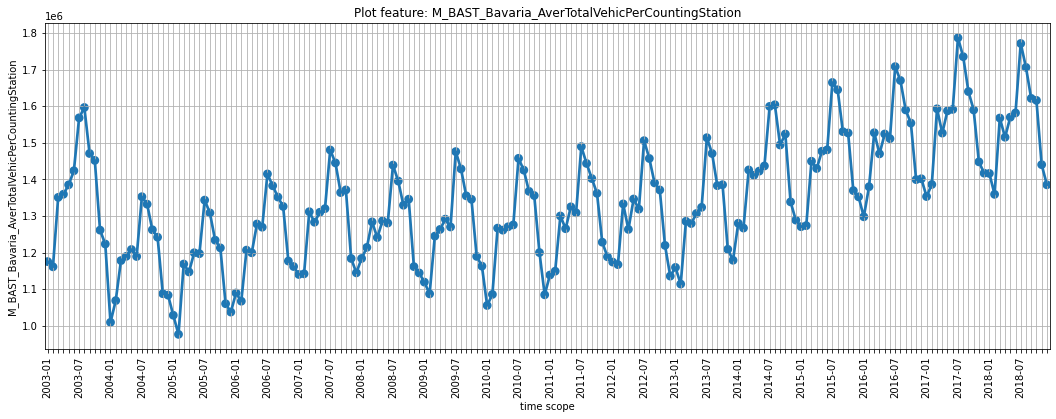

In [6]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/BAST_Bavaria_CountingStations_Feature_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

### Mileage in km
**Overview of the data:**\
Timespan: 2014 until 2018\
Number of samples: 4\
Features: 3

**Why did we choose the data source and how it might help us:**\
The dataset contains information of the domestic mileage for the years 2014 until 2018. The data is collected at the general car inspection in Germany. It is divided in e.g. vehicle types, fuel type and similar. With mileage it is possible to estimate an approximately greenhouse gas emission for the corresponding year via the buttom up estimation.

Dataprocessing notebook: M_Process_TrafficInKM.ipynb \
The data is downloaded and processed to the csv format. It contains yearly values and only the total mileage (without any separation in vehicle types or similar) is taken and stored in the feature value M_Mileage_in1000km. The feature M_AverageAnnualMileage_inkm contains information about the annual average mileage per vehicle and M_MediumVehicleInvetory covers the vehicle inventory.

**Limitations:**\
The data is only given for the timespan 2014 until 2018 in yearly values.

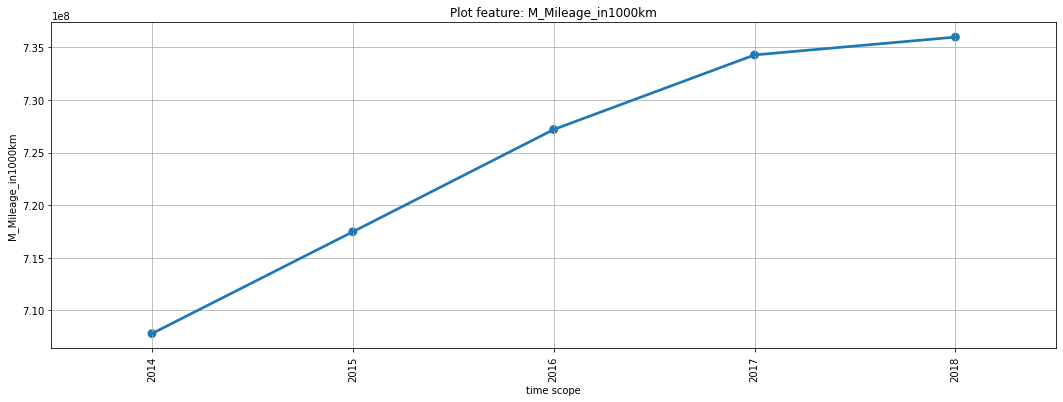

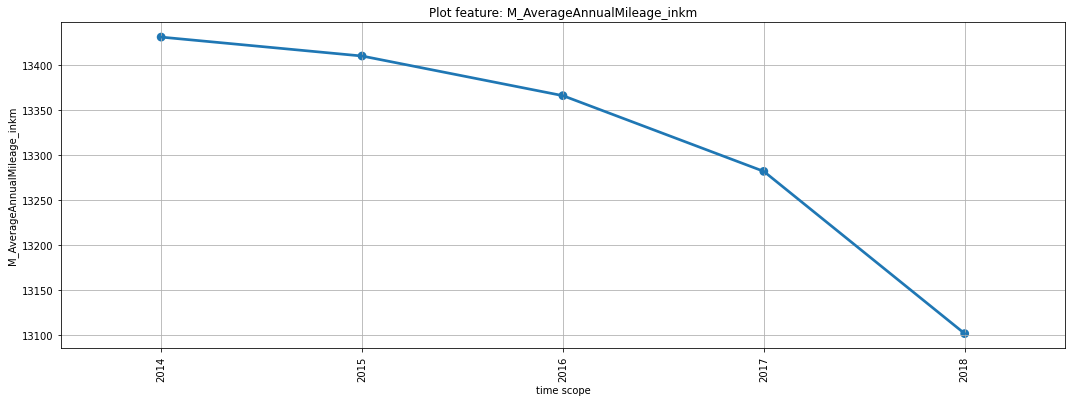

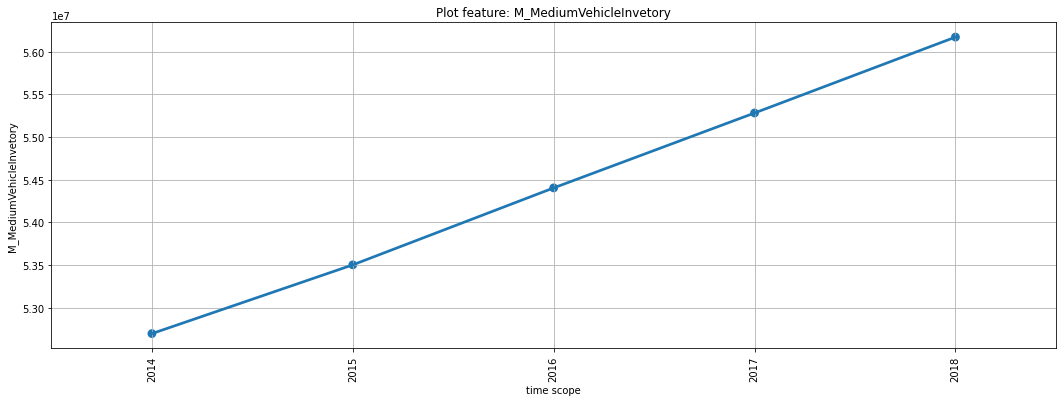

In [7]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/MileageInKM_yearly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = True

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

### Mobility Reports
Several mobility reports are available that show the different indicators during the Corona lockdown. All these reports relate to a different time span. The related value is not given, but merging the reports with the above traffic information of BAST and BAYSIS extends these datasets up to the most recent month.

#### BAST Mobility Report
**Overview of the data:**\
Timespan: March 2020 until June 2020\
Number of samples: 4\
Features: 1

**Why did we choose the data source and how it might help us:**\
Traffic count stations are the main feature for modeling the traffic utilization in Germany. The mobility report of BAST shows the decrease of traffic during the Corona Pandemic and therefore gives most recent information and can extend the BAST timeseries if the reference value is given/calculated. The mobility report value of BAST is a percentage value that shows the difference in traffic utilization in Germany in relation to the timespan 2nd of February 2020 until 7th of March 2020. It will help to model the traffic during the Corona pandemic.

Dataprocessing notebook: M_ProcessMR_Apple_Google_BAST.ipynb \
The weekly data is mapped to the individual days of these week and then the monthly mean is taken.

**Limitations:**\
There is no traffic count data from BAST for the timespan 2. of February to 7th of March, which this data relates to. But there is BAYSIS traffic count data available for that timespan and with the above approach of relating bavarian and german traffic it can be modeled.

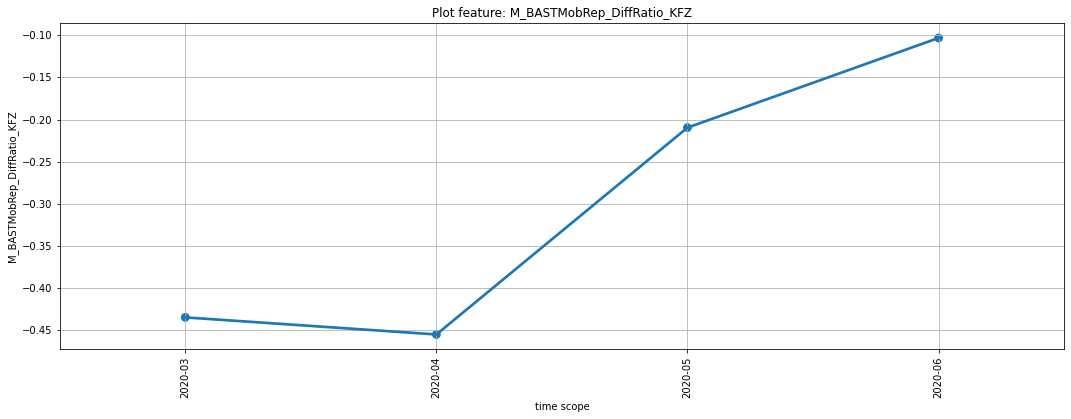

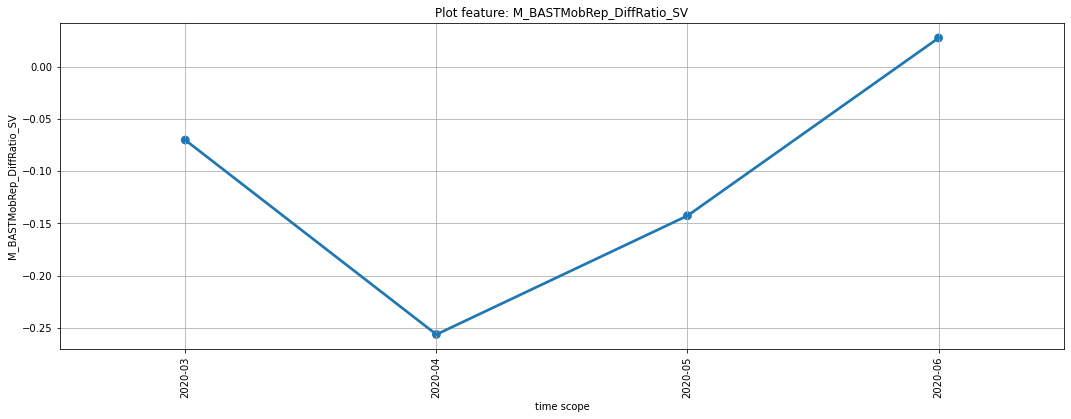

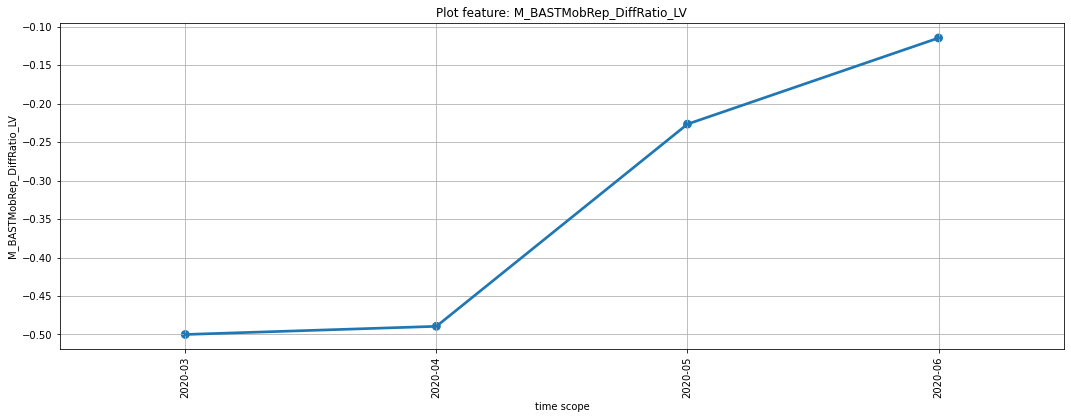

In [8]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/BASTMobilityReport_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

#### Apple Mobility Report
**Overview of the data:**\
Timespan: January 2020 until June 2020\
Number of samples: 6\
Features: 1

**Why did we choose the data source and how it might help us:**\
The Apple Mobility Report data covers the areas walking, driving and public transportation. All daily values relate to the day 13th of January 2020. The data describes a relative request volume of directions via Apple Maps for countries, regions, sub regions and cities. The time relates to Pacific Standard Time. Even though the value this data relates to is not given the dataset can be usefull to compare the traffic development of sub regions. 

Dataprocessing notebook: M_ProcessMR_Apple_Google_BAST.ipynb \
The downloaded mobility report is processed to monthly means. The feature contains the monthly means of the relative request volume for driving directions for Germany.

**Limitations:**\
The data relates to one day of the year (13th of January 2020). Other datasets (e.g. BAYSIS) have a monthly frequency and therefor it is difficult to bring these datasets in relation to each other.

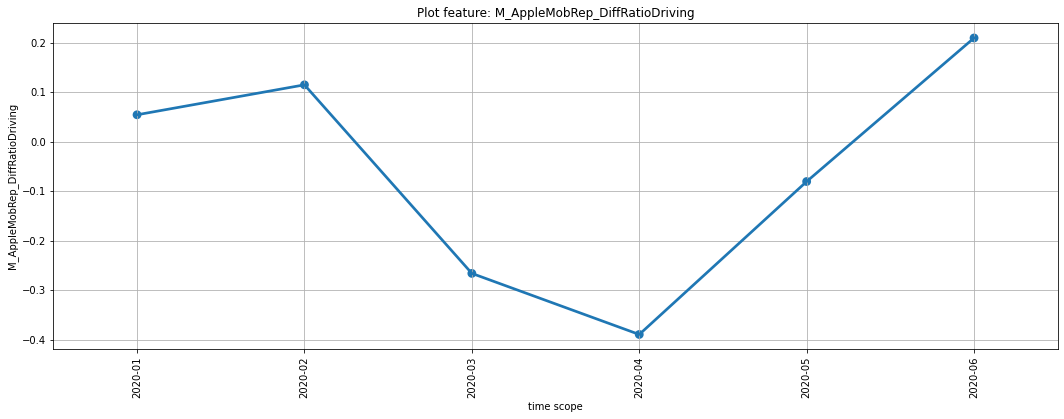

In [9]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/AppleMobilityReport_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

#### Google Mobility Report
**Overview of the data:**\
Timespan: February 2020 until June 2020\
Number of samples: 5\
Features: 6

**Why did we choose the data source and how it might help us:**\
The Google Mobility Report contains information about where people are. It covers the locations retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, and residential. The data gives relative information to the time span 3rd of January 2020 until 6th of February 2020 and provides data on the scale of countries. The data can be used to relate the traffic information to the behavior of people like e.g. an increase in home office. \

Dataprocessing notebook: M_ProcessMR_Apple_Google_BAST.ipynb \
The data is downloaded and processed to monthly means for each location. The feature contains the monthly means for whole Germany.

**Limitations:**\
The data does not directly cover traffic information but rather where people are.


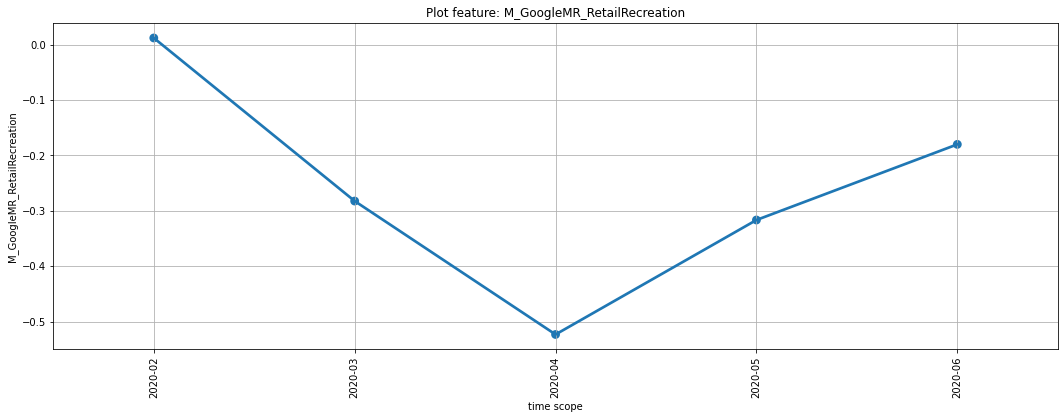

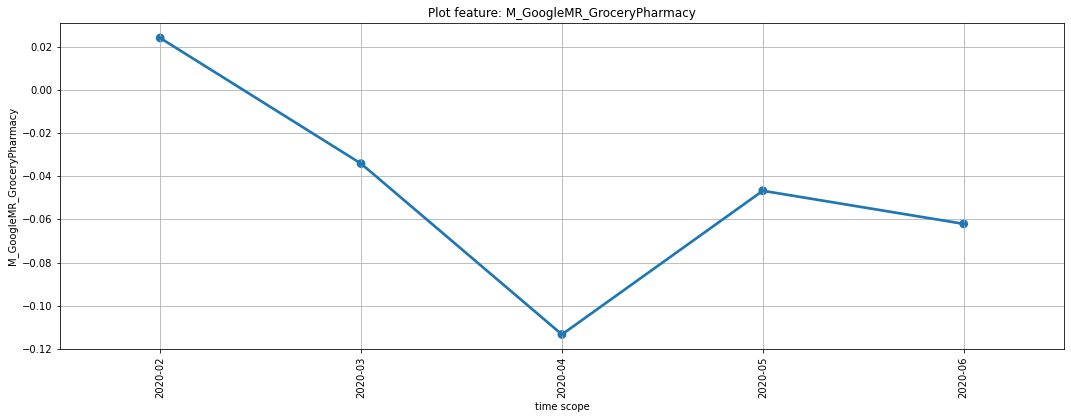

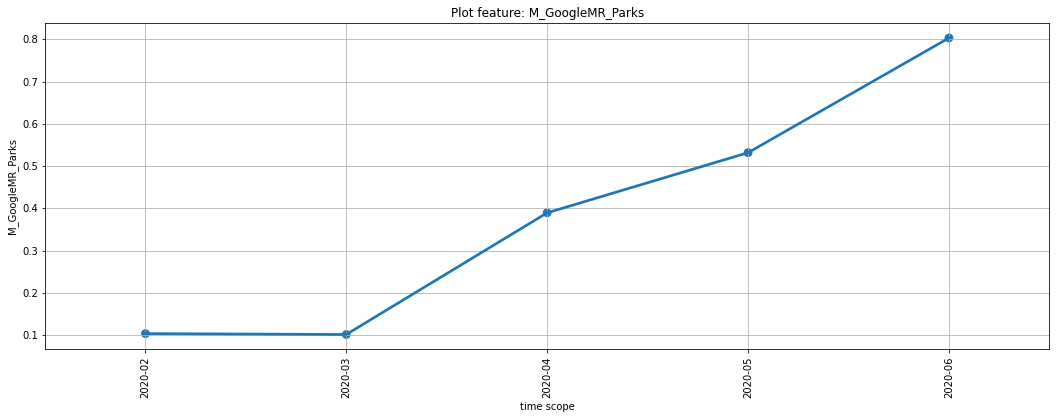

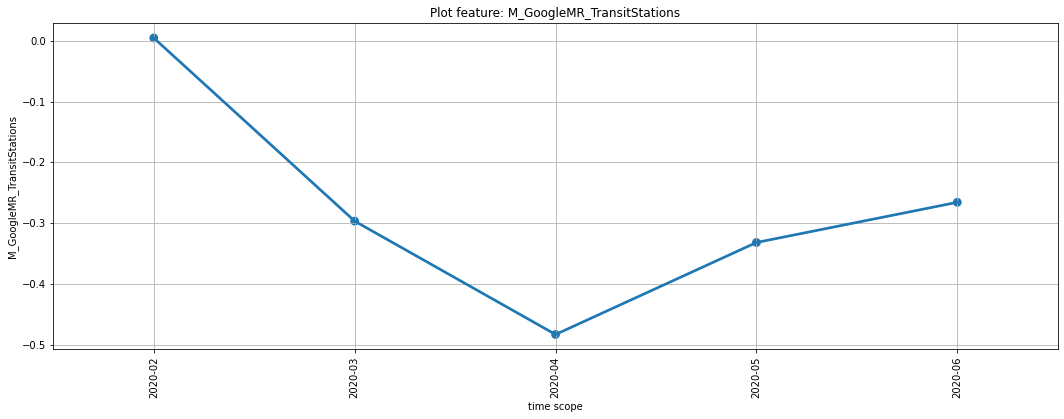

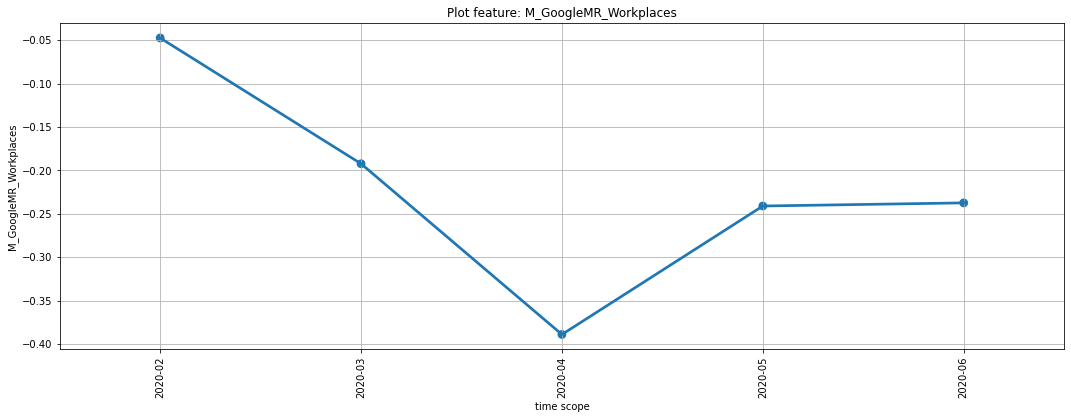

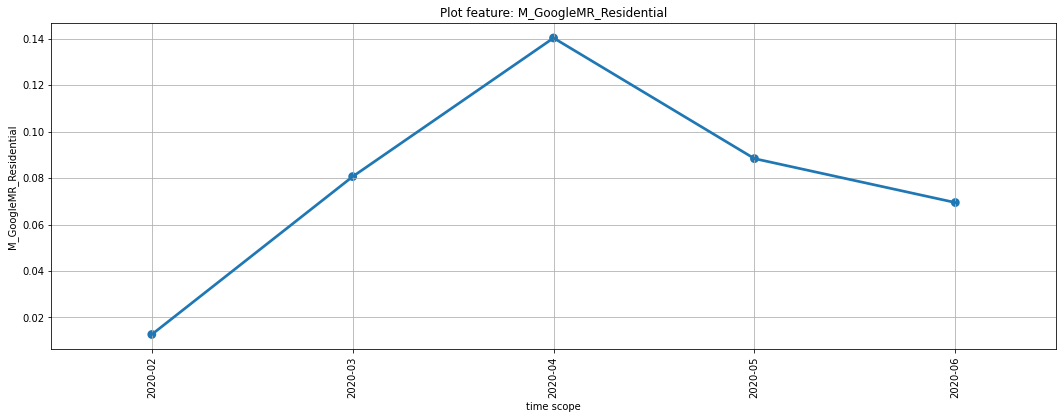

In [10]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/GoogleMobilityReport_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

#### TomTom Mobility Report
**Overview of the data:**\
Timespan: January 2020 until June 2020\
Number of samples: 6\
Features: 2

**Why did we choose the data source and how it might help us:**\
The TomTom dataset contains daily traffic congestion information of 416 cities in 57 countries and 6 continents. In Germany it covers 26 cities of which 25 cities contain information about the traffic congestion of 2020 in relation the correlated day in 2019. The data on the website is updated daily. It can be used to cover the traffic development of urban areas, as traffic count stations mostly cover highways and streets of type B. \

Dataprocessing notebook: M_UpdateTomTom.ipynb \
The daily data is automatically downloaded by a webcrawler for all of the 25 cities in Germany and processed to monthly means. Two values are processed: traffic congestion and the ratio of the traffic congestion to the correlated day in 2019 which are processed to monthly means and then averaged over the 25 cities. The feature value M_TomTomAverageCityCongestion contains the information about the mean traffic congestion in big german cities for each month and M_TomTomAverageDiffRatio_20_To_19 contains the ratio to the traffic congestion of the corresponding month in 2019.

**Limitations:**\
The dataset only contains information about city traffic but not about highways or rural ares. 

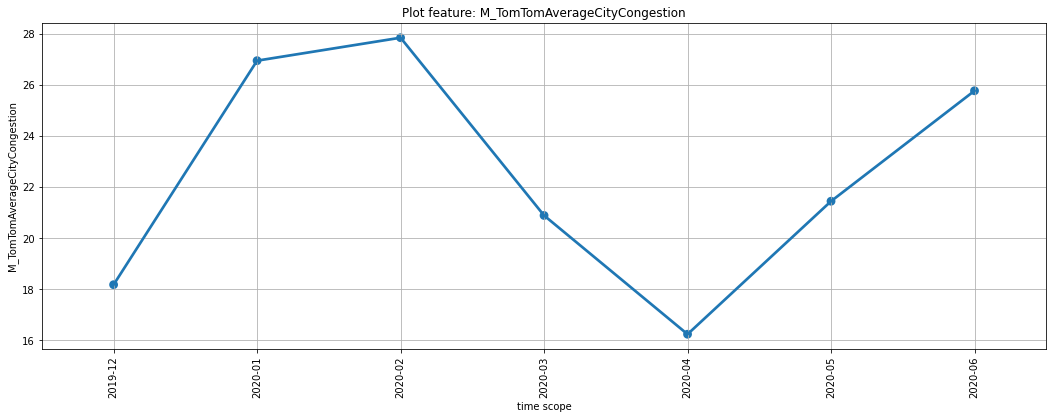

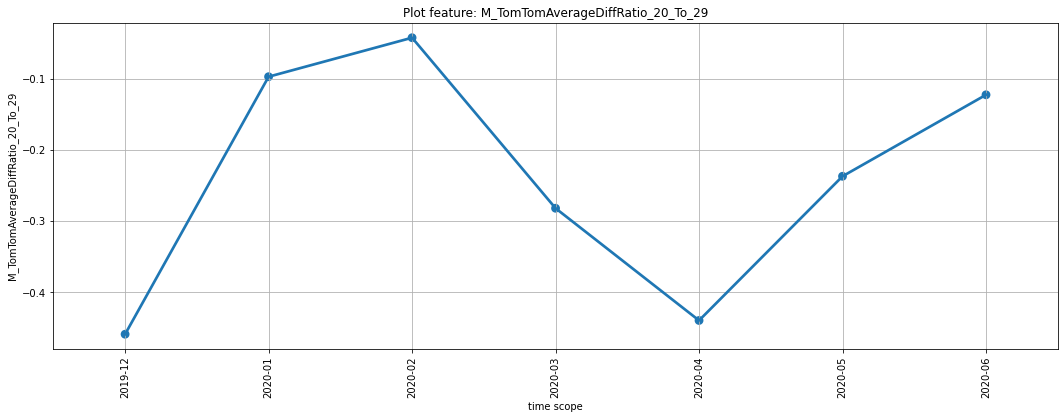

In [11]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/AverageOfCitiesGermanyTomTom_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

### Merging different data sources for one vehicle traffic feature
**Overview of the data:**\
Timespan: 2003 until June 2020\
Number of samples: 198\
Features: 3

**Why did we choose the data source and how it might help us:**\
Due to the data coverage of vehicle traffic data, which is not consitent it was needed to merge different datasources in order to create one continuous feature. For this the traffic count data of BAST and BAYSIS and the mobility report of BAST is taken into account. This new feature represents a time series of the vehicle traffic in Germany for the time span 2003 until June 2020.

Dataprocessing notebook: M_CreateVehicleTrafficFeature.ipynb \
The BAYSIS counting stations are also included in the BAST data which reaches until 2018. But the counting stations data from BAYSIS is much more recent and covers the time span 2017 until April 2020. This results in a continuous time series for traffic counts in Bavaria from 2003 until 2020. A Linear Regression is used to map the Bavarian traffic on the German traffic for the time span of 2003 until 2018, that both datasets cover. Picking a random 25% test set results in a r2 of 0.92 and a RMSE of around 30000, which is 3% of the mean of german traffic. Using this trained linear model the German traffic can be estimated for the time span January 2019 until April 2020, using the traffic count from Bavaria from the BAYSIS website. \
The mobility report of BAST is referenced to Febraury 2020. This reference data is not publicly available, but now estimated by the above explained algorithm. Using this mobility report the traffic decrease caused by the Corona pandemic can is calculated for the months April, May and June 2020. \
Different classes of cars are seperated. The feature M_KFZ represents the total number of vehicles, M_LV only the light vehicles, and M_SV the heavy vehicles. This separation is done according to this [BAST formular](https://www.bast.de/BASt_2017/DE/Statistik/Verkehrsdaten/Verkehrsbarometer.html?nn=1820340).

**Limitations:**\
The dataset only reaches back to 2003.

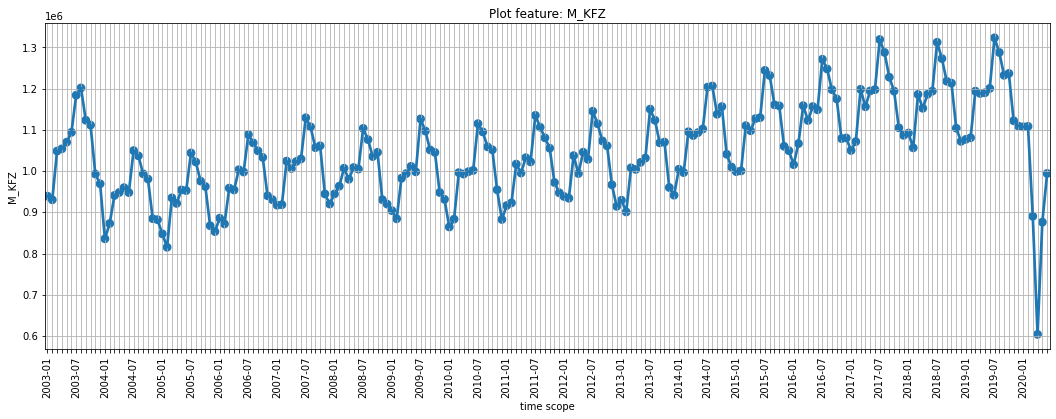

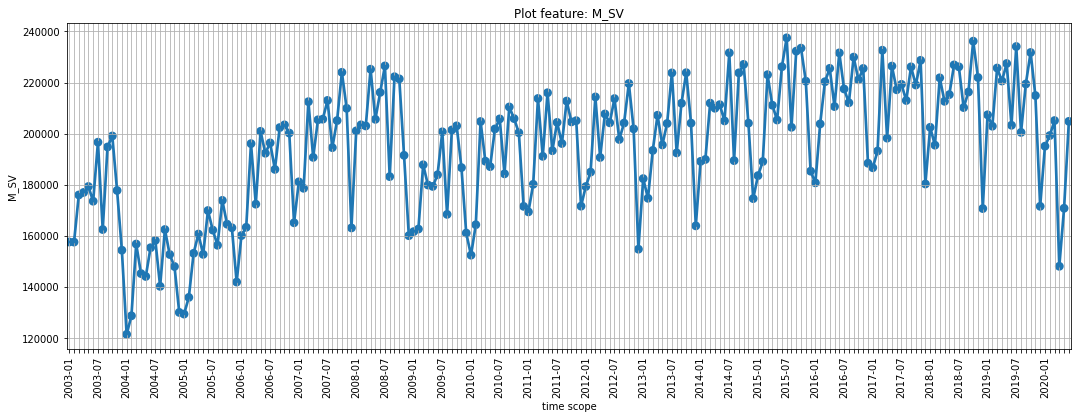

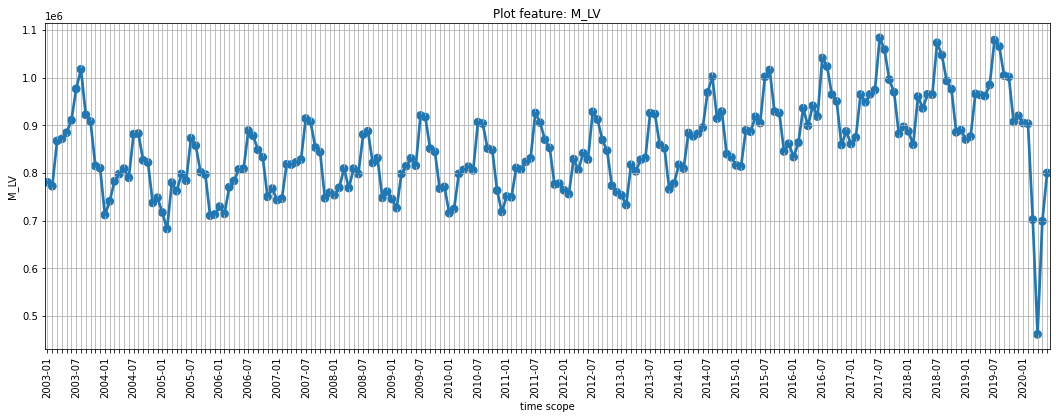

In [12]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/M_BastBaysisBastMR_Feature_Ger_Cor.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'FuelSale'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

### MWV fuel sale: Diesel, Benzin, and airplane fuel
**Overview of the data:**\
Timespan: 2000 until April 2020\
Number of samples: 244\
Features: 18

**Why did we choose the data source and how it might help us:**\
CO2 emissions are caused by burning fossil fuels. This counts for every sector. \
The fuel sale of 
- Diesel, Benzin, and airplane fuel is assigned to the traffic sector. 
- heating oil is assigned to the energy and household sector.
- Raw gasoline (Rohbenzing) and gasoline components (Benzinkomponenten) is assigned to the economy sector.

Dataprocessing notebook: Process_MWV_Rohoel.ipynb\
The data is downloaded manually and stored in one folder. The notebook reads all files in this folder and creates dataframes for each fuel type which are separated in different sectors. 

**Limitations:**\
E.g. heating oil does not directly correlate to the CO2 emissions of the month where it was bought. \
Data only reaches until April 2020.

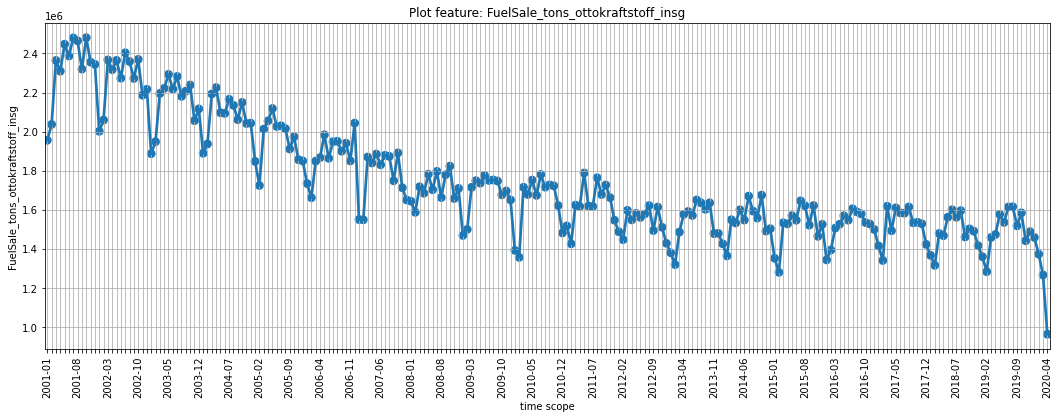

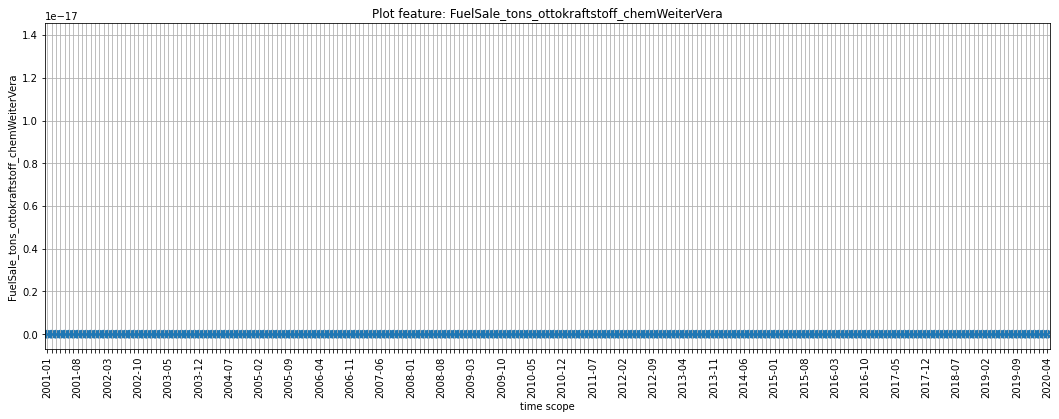

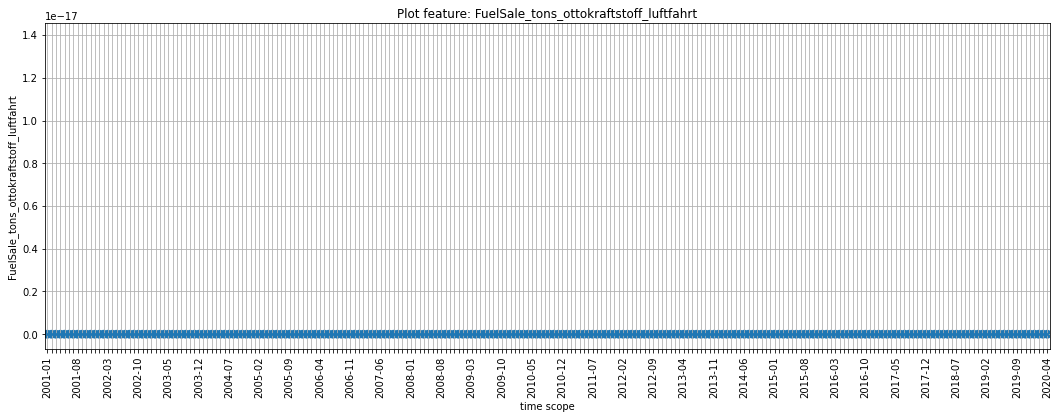

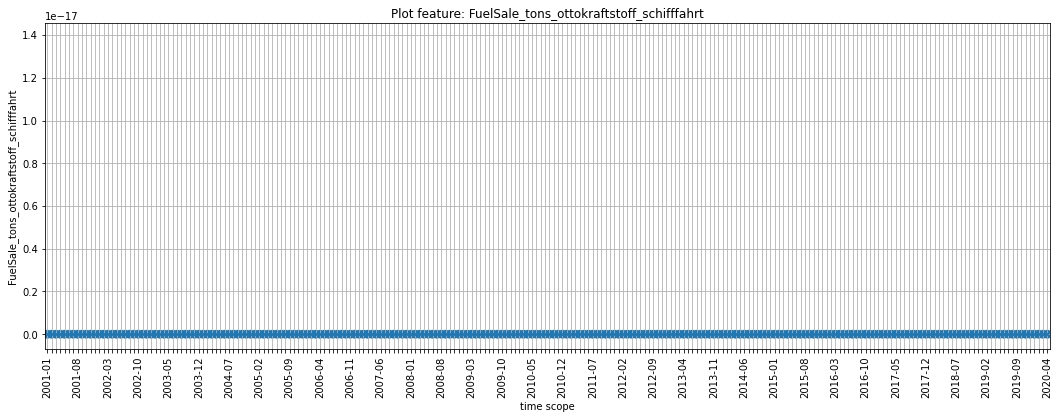

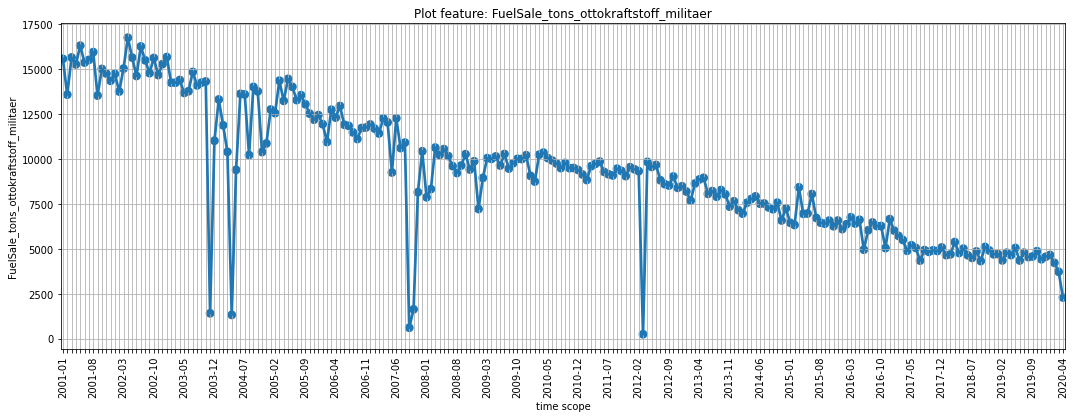

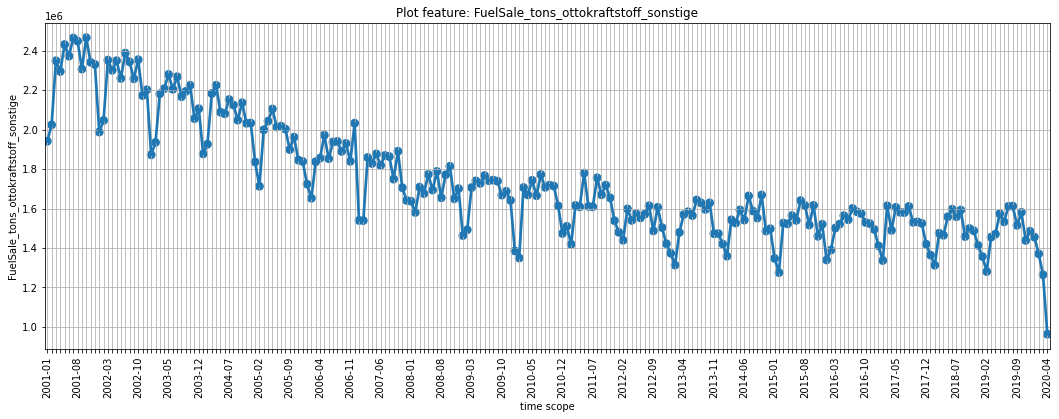

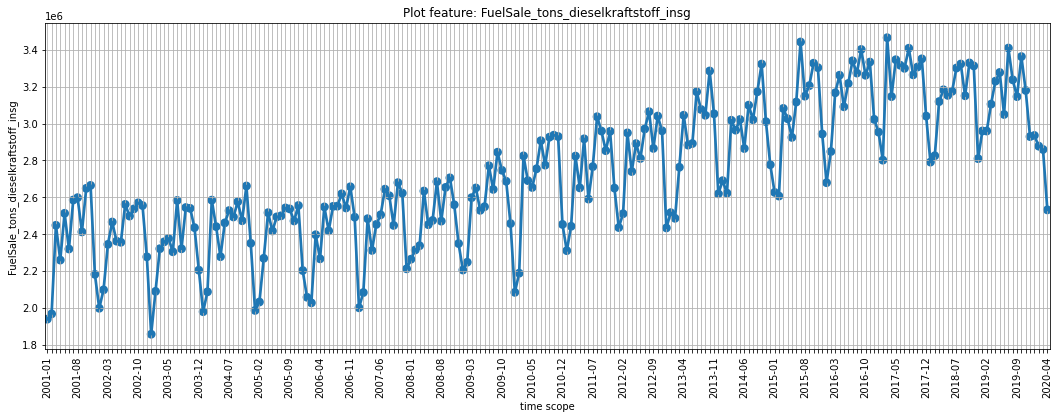

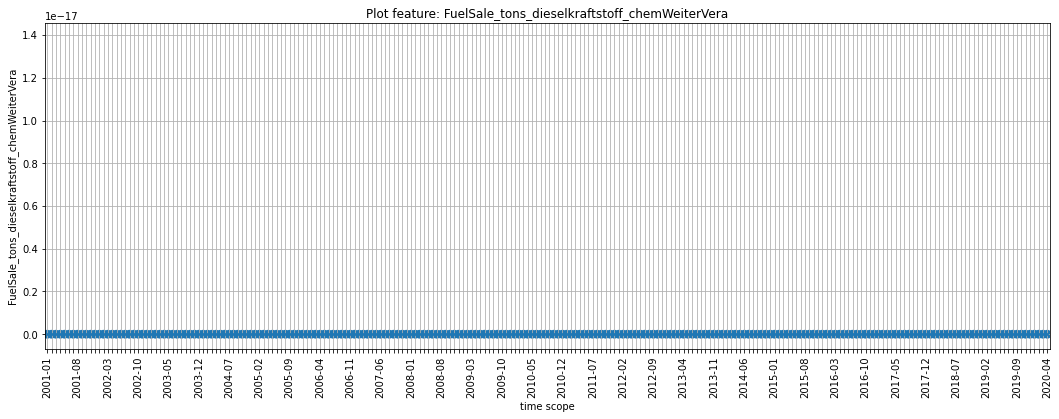

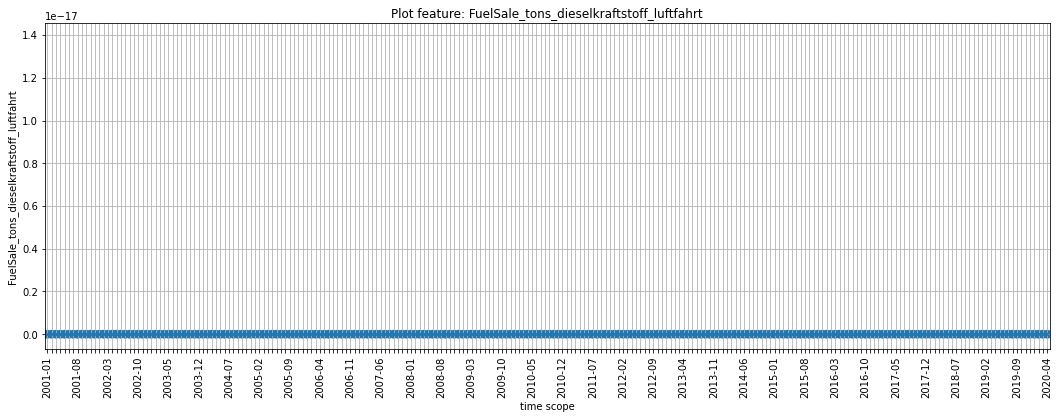

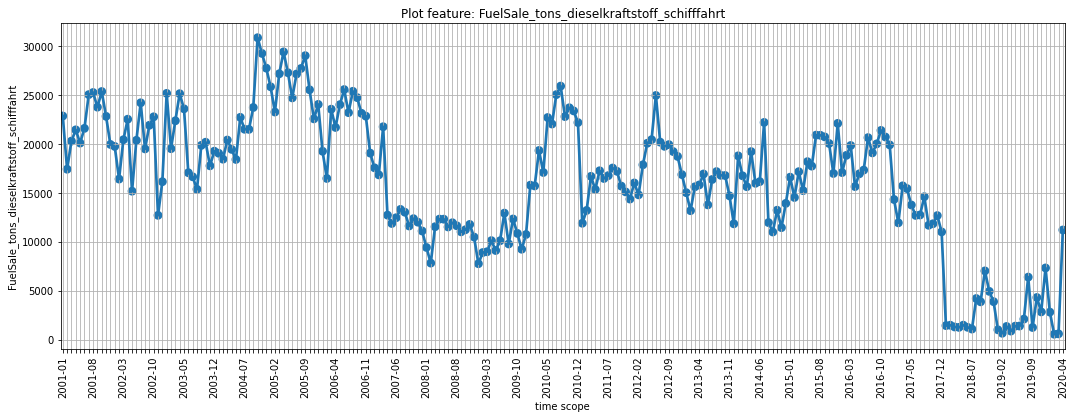

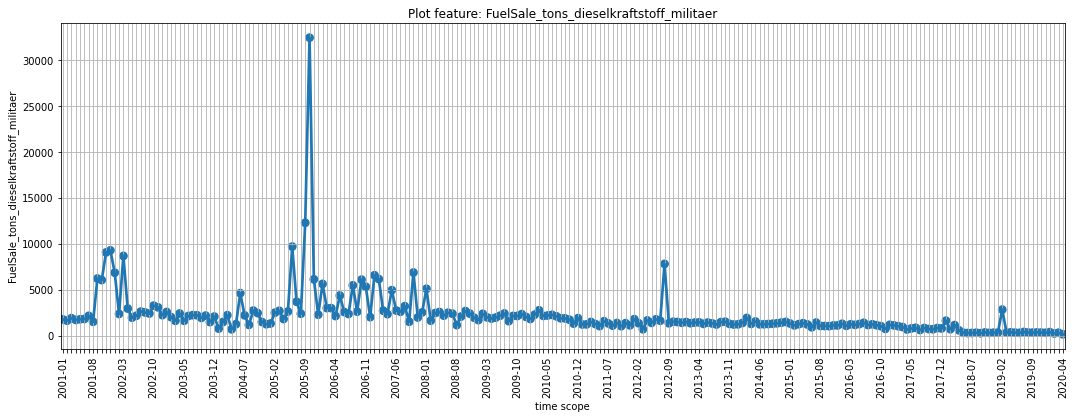

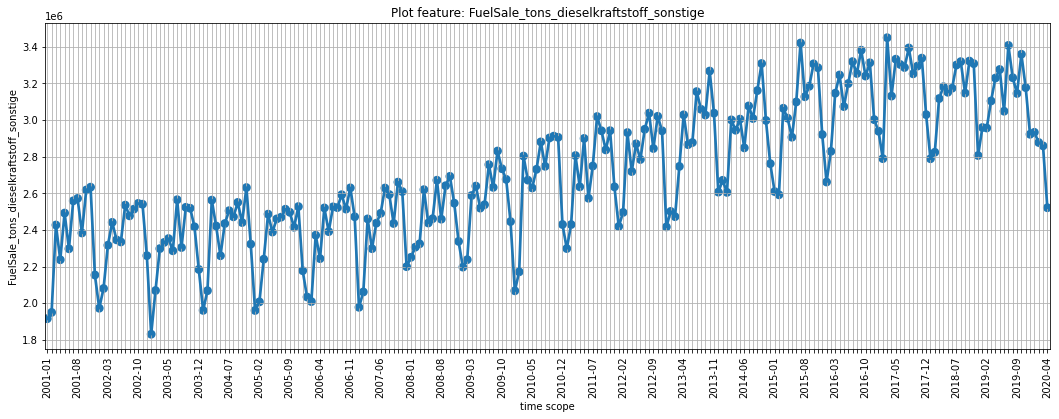

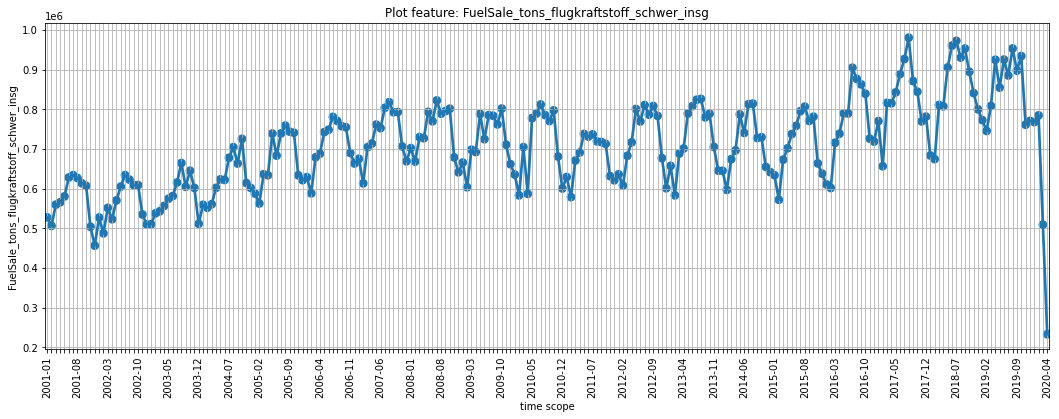

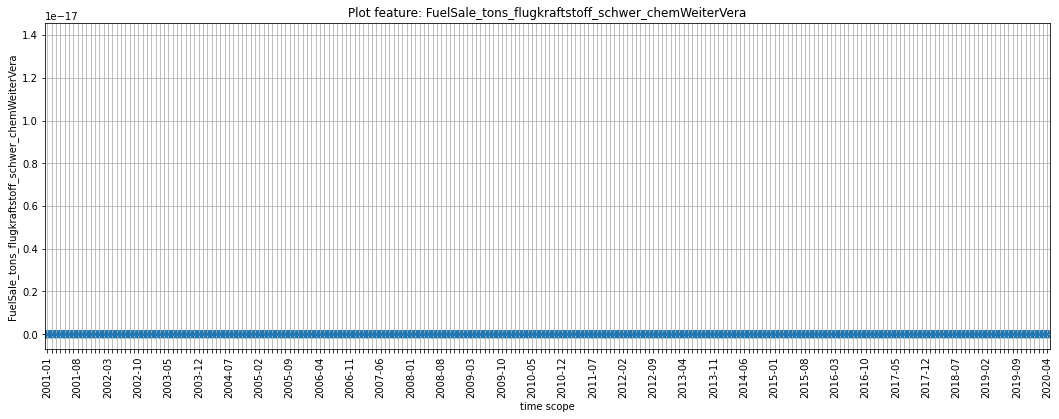

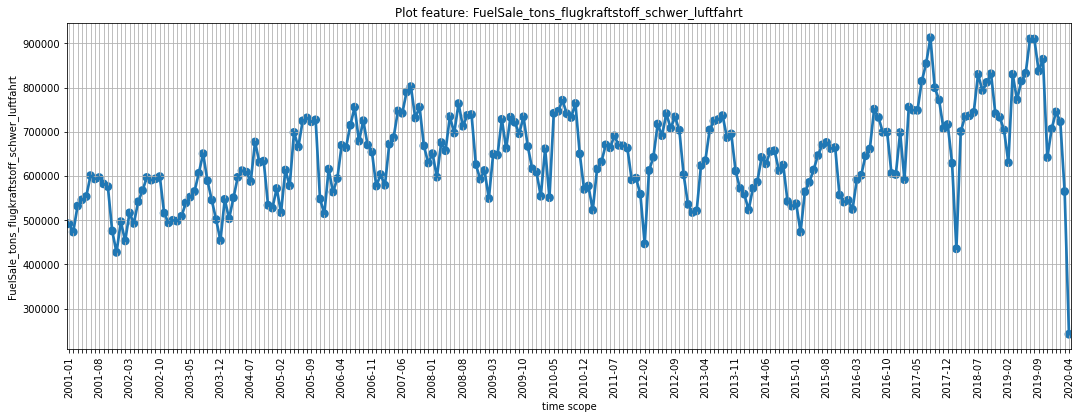

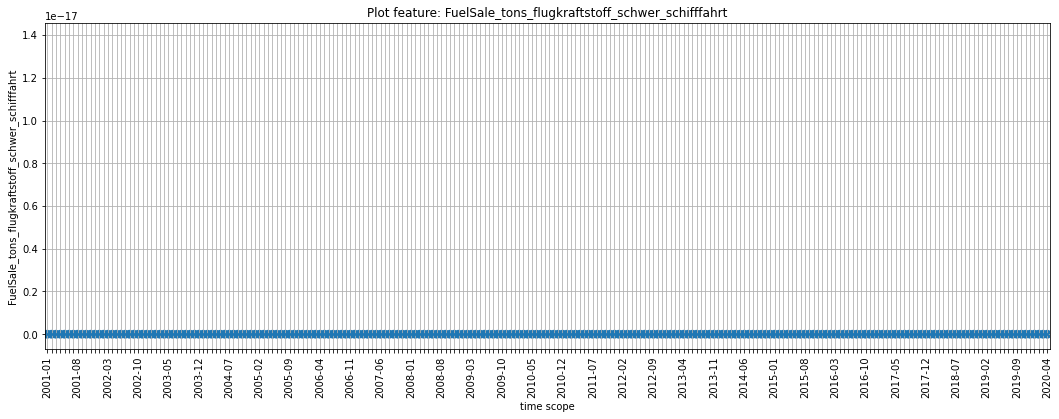

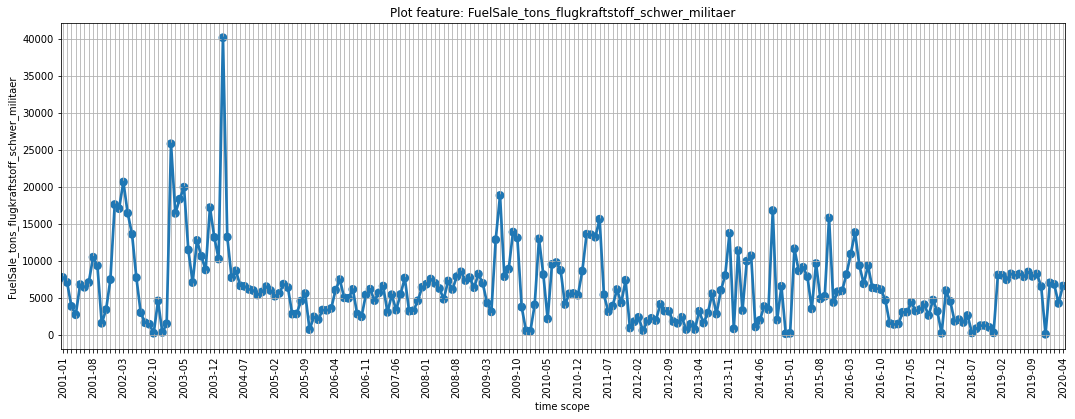

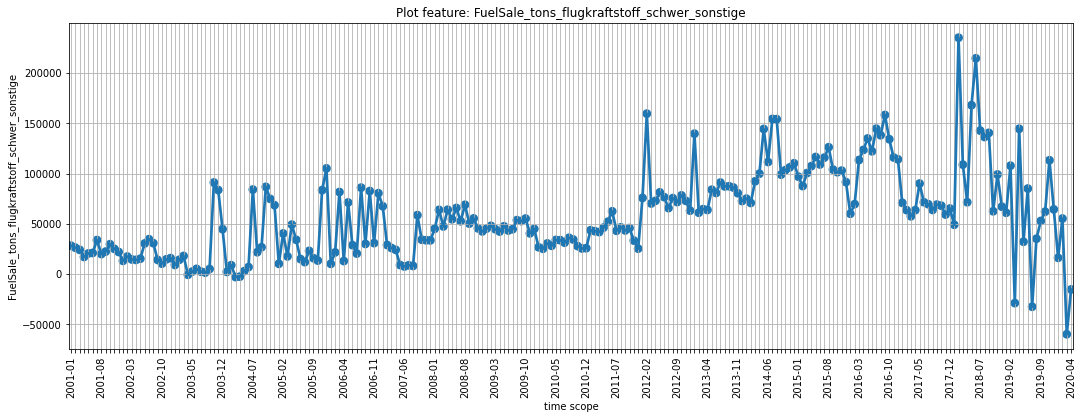

In [13]:
## Benzin (Gasoline)
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/M_FuelSale_Ottokraftstoff.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

## Diesel
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/M_FuelSale_Dieselkraftstoff.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

## Aviation
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/M_FuelSale_FlugkraftstoffSchwer.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

## Aviation

#### Aviation statistics for Germany
**Overview of the data:**\
Timespan: January 2011 until April 2020\
Number of samples: 112 (+ 8 NAN samples)\
Features: 6

**Why did we choose the data source and how it might help us:**\
Air traffic has obviously declined sharply due to the Corona crisis. The reasons for this were travel and vacation bans. Although air traffic is only responsible for 3% of CO2 emissions in Germany, this is an important factor. Due to the high altitude where the emissions take place, the consequences are considerably worse, which is why the emissions are weighted by a factor of 3.
The dataset includes 6 features which are: Number of starts, passengers per starts, freight per starts, Number of landings, passengers per landings, freight per landings. This will be used as an indicator for mapping/predicting CO2 gas emissions as well as when creating the model during the crisis for predicting future development.

Dataprocessing Notebook: M_Process_Aviation_Dataset.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 46421-0012) and later processed to fit the form of processing. Before downloading th data, Frankfurt/Main (F-FRA) is selected as the airport of interest. This limitation is not a problem, since the total values ​​of all German airports are still included. The selection is necessary to download the data for the entire available period.

**Limitations:**\
Data is only available until April and so one can only make a conclusion for the time of the lockdown. For the prediction of the future trend, current data (data after lockdown) is necessary.  Need to be updated somewhen.

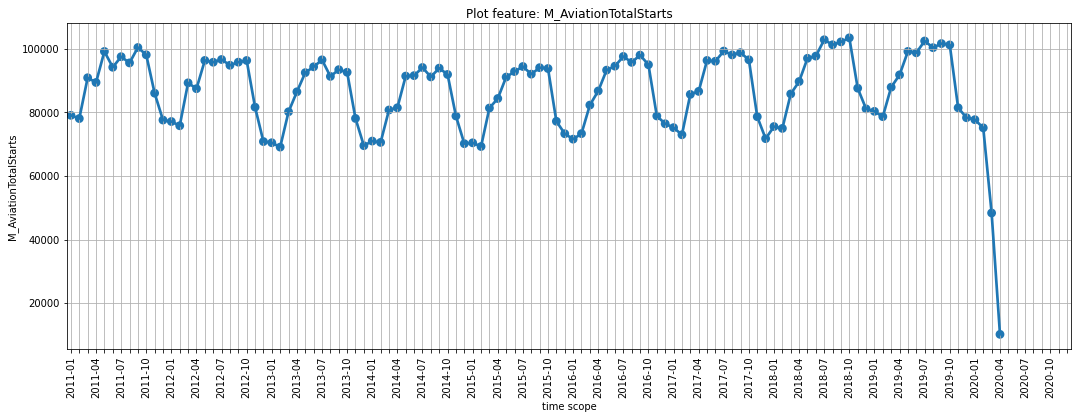

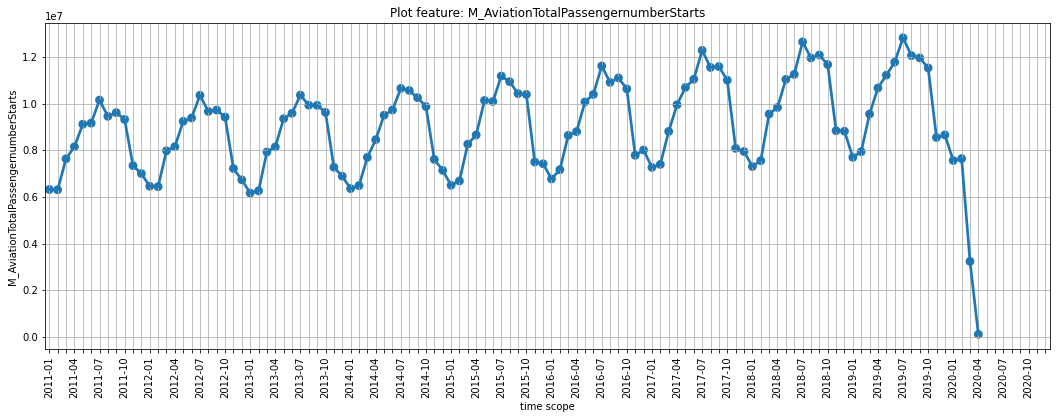

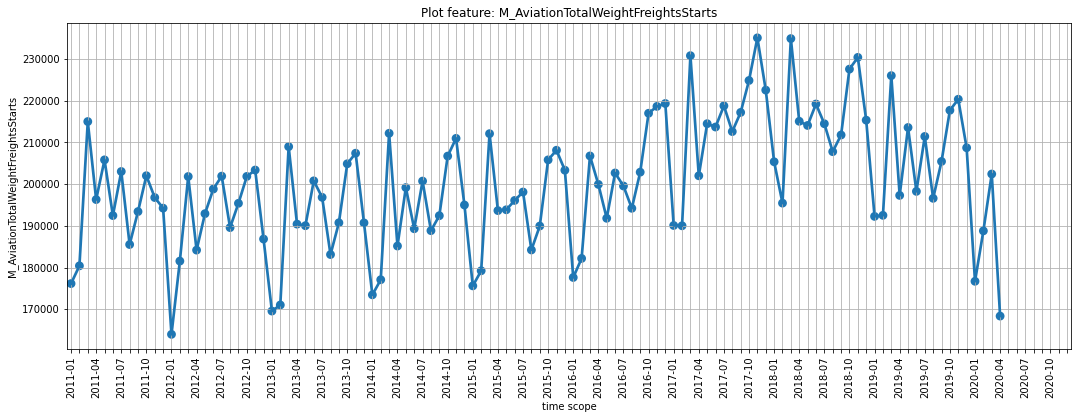

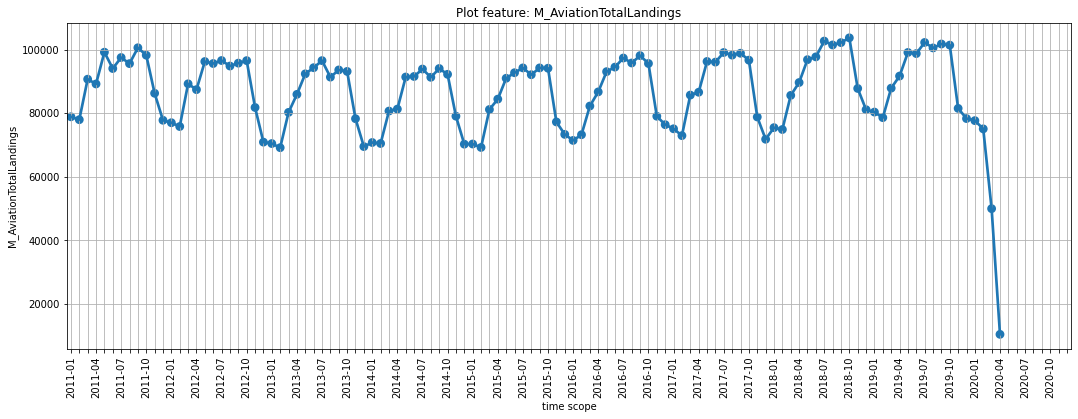

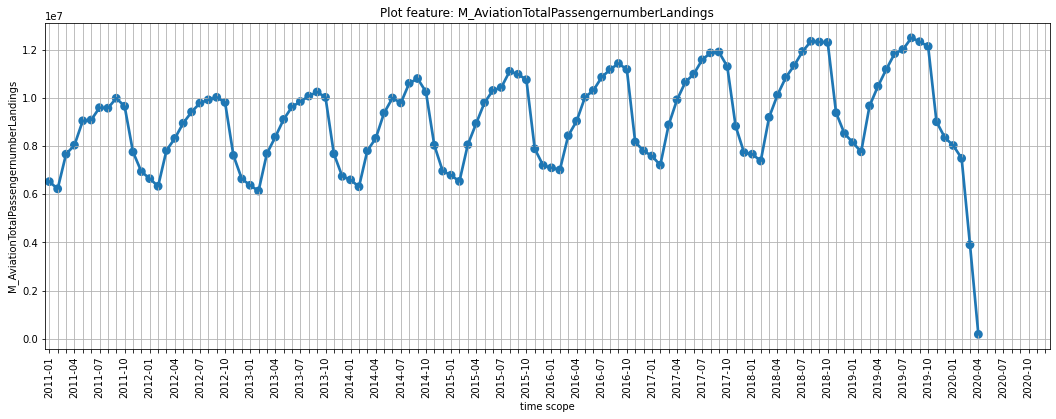

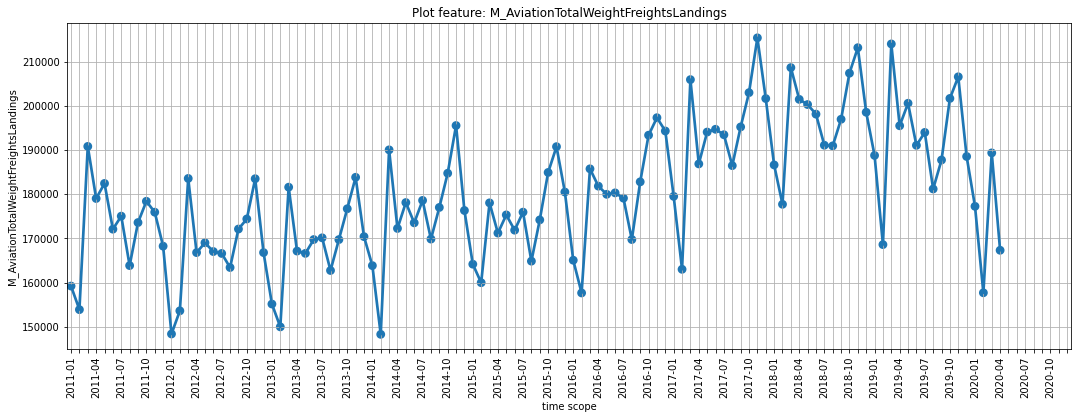

In [14]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/Aviation_Statistics_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'aviation'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        # plot features
        plot_data(timeseries, i)

#### Final Aviation feature for Germany
**Overview of the data:**\
Timespan: January 2011 until June 2020\
Number of samples: 114 (+ 6 NAN samples)\
Features: 1

**Why did we choose the data source and how it might help us:**\
Air traffic has obviously declined sharply due to the Corona crisis. The reasons for this were travel and vacation bans. Although air traffic is only responsible for 3% of CO2 emissions in Germany, this is an important factor. Due to the high altitude where the emissions take place, the consequences are considerably worse, which is why the emissions are weighted by a factor of 3.
The dataset now only includes 1 feature which is the total sum of starts and landings in germany. This will be used as an indicator for mapping/predicting CO2 gas emissions as well as when creating the model during the crisis for predicting future development.

Dataprocessing Notebook: M_Process_Final_Aviation_Dataset.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 46421-0012) and later processed to fit the form of processing. Before downloading th data, Frankfurt/Main (F-FRA) is selected as the airport of interest. This limitation is not a problem, since the total values of all German airports are still included. The selection is necessary to download the data for the entire available period.

**Limitations:**\

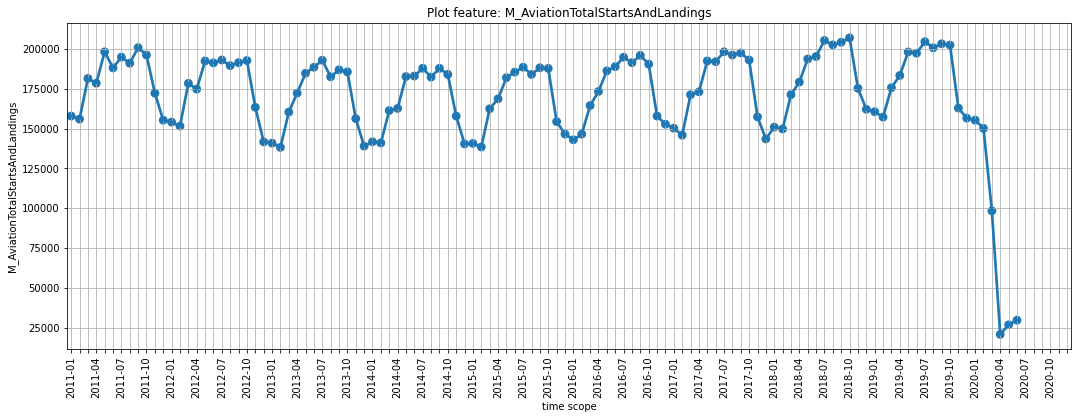

In [15]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/Aviation_Final_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'aviation'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        # plot features
        plot_data(timeseries, i)

## Shipping

#### Inland freight shipping (Binnenschifffahrt)
**Overview of the data:**\
Timespan: January 1991 until February 2020\
Number of samples: 350\
Features: 1

**Why did we choose the data source and how it might help us:**\
Freight traffic makes up a large proportion of daily traffic in Germany and causes significant CO2 emissions. Many goods within Germany are transported by inland waterways (Binnenschifffahrt-Güterverkehr). Since the economy is suffering from the Corona crisis, it is conceivable that freight traffic and the resulting CO2 emissions have also decreased. This will be used as an indicator for mapping/predicting CO2 gas emissions as well as when creating the model during the crisis for predicting future development.

Dataprocessing Notebook: M_Process_Inlandshipping_Dataset.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 46321-0002) and later processed to fit the form of processing. 

**Limitations:**\
Data is only available until February. An impact of the Corona crisis is not apparent yet. Need to be updated somewhen and evaluated again.

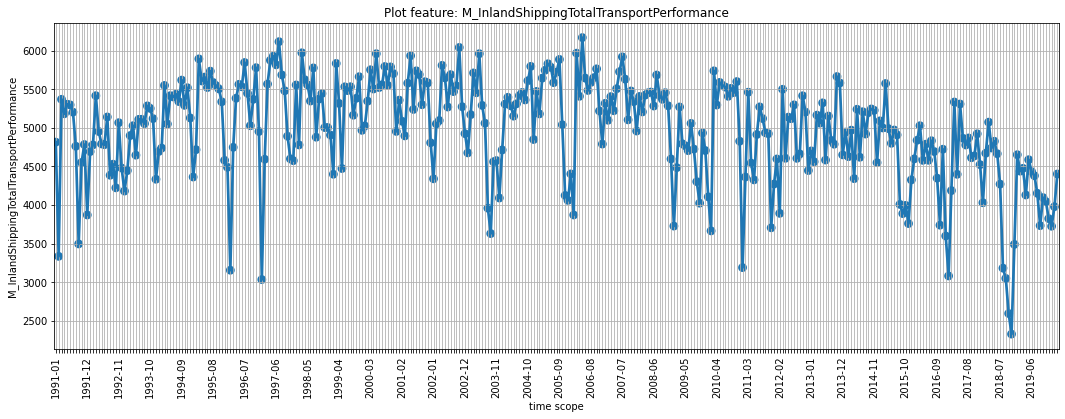

In [16]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/Shipping_InlandFreightTransport_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'shipping'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        # plot feature
        plot_data(timeseries, i)

#### Seafaring
**Overview of the data:**\
Timespan: January 2011 until February 2020\
Number of samples: 110\
Features: 2

**Why did we choose the data source and how it might help us:**\
Freight traffic makes up a large proportion of daily traffic in Germany and causes significant CO2 emissions. Germany is an exporting country and ships many goods all over the world. In addition, a lot of goods are imported from countries like China. Since the economy is suffering from the Corona crisis, it is conceivable that freight traffic and the resulting CO2 emissions have also decreased. This will be used as an indicator for mapping/predicting CO2 gas emissions as well as when creating the model during the crisis for predicting future development.

Dataprocessing Notebook: M_Process_Seafaring_Dataset.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 46331-0004) and later processed to fit the form of processing. Some samples had to be deleted due to incomplete data. Since a distinction was made between the groups of goods, a total sum was calculated that indicates the amount of goods transported in tons.

**Limitations:**\
Data is only available until February. An impact of the Corona crisis is not apparent yet. Need to be updated somewhen and evaluated again.

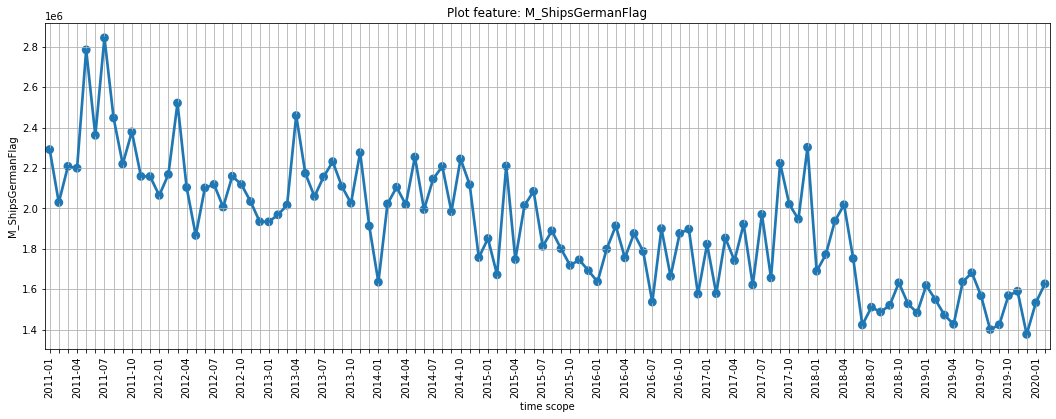

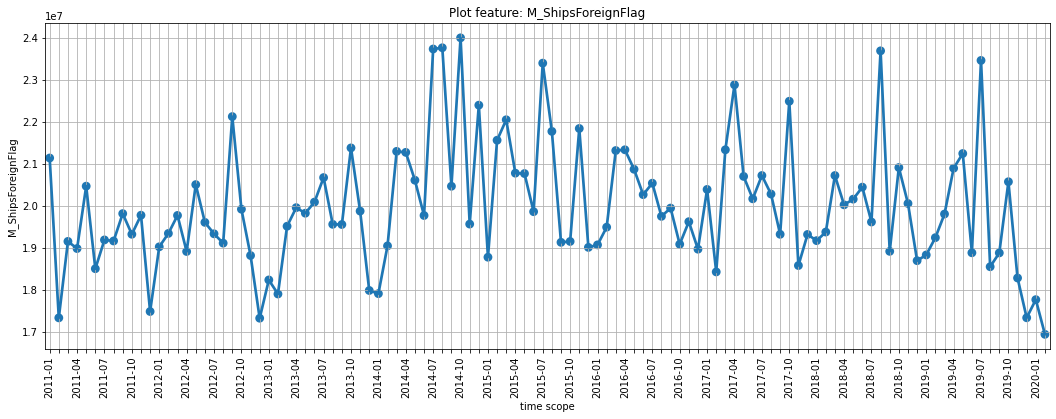

In [17]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/Seafaring_Statistics_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'shipping'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        # plot feature
        plot_data(timeseries, i)

## Railway

#### Railway freight transport
**Overview of the data:**\
Timespan: January 2005 until February 2020\
Number of samples: 182\
Features: 1

**Why did we choose the data source and how it might help us:**\
Freight traffic makes up a large proportion of daily traffic in Germany and causes significant CO2 emissions. Many goods within Germany are transported by trains. Since the economy is suffering from the Corona crisis, it is conceivable that freight traffic and the resulting CO2 emissions have also decreased. This will be used as an indicator for mapping/predicting CO2 gas emissions as well as when creating the model during the crisis for predicting future development.

Dataprocessing Notebook: M_Process_RailwayFreight_Dataset.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 46131-0004) and later processed to fit the form of processing.

**Limitations:**\
Data is only available until February. An impact of the Corona crisis is not apparent yet. Need to be updated somewhen and evaluated again.

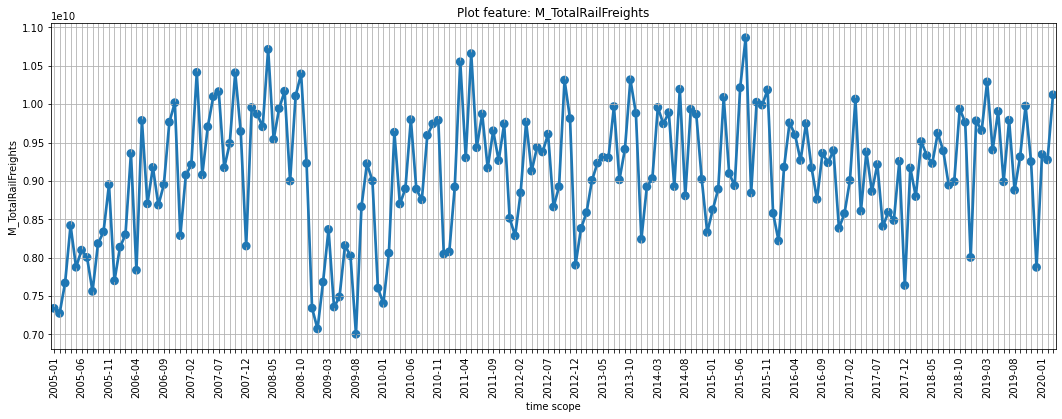

In [18]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/mobility/Railway_FreightTransport_monthly.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'railway'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        # plot feature
        plot_data(timeseries, i)

# Economy

## Economic Indicators

### Consumer Price Index
**Overview of the data:**\
Timespan DAX: 01/1991 until 05/2020\
Frequency: montly\
Number of samples: 354\
Features: 1\
**Why did we choose the data source and how it might help us:**\
The economy is closely correlated to the producing industry which is one of the biggest sources of greenhouse gas emmissions in germany.
The consumer price index gives a relative value about the change of the prices for general goods in the last years. It is closely related to the inflation rate and should also correlate with supply and demand.

Dataprocessing Notebook: ECO_Process_Consumer_Price_Index.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 61111-0002) and later processed to fit the form of processing.


In [ ]:
df = pd.read_csv('../data/economy/ECO_Consumer_Price_Index.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'economic_indicator'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

### Number of Unemployment
**Overview of the data:**\
Timespan DAX: 01/2005 until 05/2020\
Frequency: montly\
Number of samples: 185\
Features: 1\
**Why did we choose the data source and how it might help us:**\
The economy is closely correlated to the producing industry which is one of the biggest sources of greenhouse gas emmissions in germany.
The number of unemployed people in a country should be one of the most important indicators about the economic situation. During a crisis, the loss of jobs is a definite effect, even though there are programs by the state to reduce this number.

Dataprocessing Notebook: ECO_Process_Unemployment.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 13211-0002) and later processed to fit the form of processing.

**Limitations:**\
Data is only available from January 2005. So this indicator can not be used to fit/model older data.


In [ ]:
df = pd.read_csv('../data/economy/ECO_Number_Unemployment.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'economic_indicator'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

## Stock Market

### DAX
**Overview of the data:**\
Timespan DAX: 1990 until today\
Frequency: montly\
Number of samples: 366\
Features: 1\
**Why did we choose the data source and how it might help us:**\
The economy is closely correlated to the producing industry which is one of the biggest sources of greenhouse gas emmissions in germany.
The DAX course is a easy to get indicator about the biggest companies of the country. The values can be read daily, giving more up-to-date information about the economy than all the other possible indicators.

Dataprocessing Notebook: ECO_Process_DAX.ipynb\
The data is manually downloaded in daily values from yahoo finance and later processed to give mean values for months. In the notebook the data is also preprocessed to fit with this notebook.



In [ ]:
df = pd.read_csv('../data/economy/ECO_DAX.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'stock_market'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

### MDAX
**Overview of the data:**\
Timespan DAX: 02/1996 until today\
Frequency: montly\
Number of samples: 293\
Features: 1\
**Why did we choose the data source and how it might help us:**\
The economy is closely correlated to the producing industry which is one of the biggest sources of greenhouse gas emmissions in germany.
The MDAX rate is similar to the DAX rate, but gives an overview about the medium-sized companies in the country. Like for the DAX, it is a easy to get indicator about the mid tier companies of the country. The values can be read daily, giving more up-to-date information about the economy than all the other possible indicators.

Dataprocessing Notebook: ECO_Process_MDAX.ipynb\
The data is manually downloaded in daily values from yahoo finance and later processed to give mean values for months. In the notebook the data is also preprocessed to fit with this notebook.



In [ ]:
df = pd.read_csv('../data/economy/ECO_MDAX.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'stock_market'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

## Economic Sectors

### Turnover Wholesale
**Overview of the data:**\
Timespan DAX: 01/1994 until 04/2020\
Frequency: montly\
Number of samples: 316\
Features: 1\
**Why did we choose the data source and how it might help us:**\
The economy is closely correlated to the producing industry which is one of the biggest sources of greenhouse gas emmissions in germany.
The turnover of wholesale stores could give insights about the willingness to take risks of small businesses.

Dataprocessing Notebook: ECO_Process_Wholesale.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 45211-0005) and later processed to fit the form of processing.


In [ ]:
df = pd.read_csv('../data/economy/ECO_Wholesale_Turnover.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'economic_sector'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

### Turnover Retail
**Overview of the data:**\
Timespan DAX: 01/1994 until 04/2020\
Frequency: montly\
Number of samples: 316\
Features: 1\
**Why did we choose the data source and how it might help us:**\
The economy is closely correlated to the producing industry which is one of the biggest sources of greenhouse gas emmissions in germany.
The turnover of retail stores gives good information about what is bought on a regular basis by customers. Since the purchasing power of the consumers relates to their situation, it should give some insights about the economy.

Dataprocessing Notebook: ECO_Process_Retail.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 45212-0004) and later processed to fit the form of processing.


In [ ]:
df = pd.read_csv('../data/economy/ECO_Retail_Turnover.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'economic_sector'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

## Hospitality Industry

### Turnover Accomodation
**Overview of the data:**\
Timespan DAX: 01/1994 until 04/2020\
Frequency: montly\
Number of samples: 316\
Features: 1\
**Why did we choose the data source and how it might help us:**\
Tourism and traveling for business purposes are normally done with a stay in another city. So the Hospitality industry could indicate the economic situation. In addition to that, there were strong impacts onto this sector by the lockdown. The turnover of accomodation represents the revenue generated by the hospitality industry. It includes all sorts of hospitality in germany.

Dataprocessing Notebook: ECO_Process_Hospitality.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 45213-0005) and later processed to fit the form of processing.


In [ ]:
df = pd.read_csv('../data/economy/ECO_Accommodation.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'hospitality_industry'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

### Turnover Hotels, Inns and Guesthouses
**Overview of the data:**\
Timespan DAX: 01/1994 until 04/2020\
Frequency: montly\
Number of samples: 316\
Features: 1\
**Why did we choose the data source and how it might help us:**\
Tourism and traveling for business purposes are normally done with a stay in another city. So the Hospitality industry could indicate the economic situation. In addition to that, there were strong impacts onto this sector by the lockdown. The turnover of Hotels, Inns and Guesthouses is more specific related to tourism than the gereral accommodation and could therefore indicate other trends.

Dataprocessing Notebook: ECO_Process_Hospitality.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 45213-0005) and later processed to fit the form of processing.


In [ ]:
df = pd.read_csv('../data/economy/ECO_Hotels_Inns_Guesthouses.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'hospitality_industry'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

### Turnover Gastronomy
**Overview of the data:**\
Timespan DAX: 01/1994 until 04/2020\
Frequency: montly\
Number of samples: 316\
Features: 1\
**Why did we choose the data source and how it might help us:**\
Tourism and traveling for business purposes are normally done with a stay in another city. So the Hospitality industry could indicate the economic situation. In addition to that, there were strong impacts onto this sector by the lockdown. Gastronomy is another important factor in this area. The turnover of gastronomy is closely related to the behavior of the people and the regulations by the government.

Dataprocessing Notebook: ECO_Process_Hospitality.ipynb\
The data is manually downloaded in monthly values from GENESIS database (table nr.: 45213-0005) and later processed to fit the form of processing.


In [ ]:
df = pd.read_csv('../data/economy/ECO_Gastronomy.csv')

# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'hospitality_industry'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)

### MWV fuel sale: Raw gasoline, gasoline components
**Overview of the data:**\
Timespan: 2000 until April 2020\
Number of samples: 244\
Features: 12

**Why did we choose the data source and how it might help us:**\
CO2 emissions are caused by burning fossil fuels. This counts for every sector. \
The fuel sale of 
- Diesel, Benzin, and airplane fuel is assigned to the traffic sector. 
- heating oil is assigned to the energy and household sector.
- Raw gasoline (Rohbenzing) and gasoline components (Benzinkomponenten) is assigned to the economy sector.

Dataprocessing notebook: Process_MWV_Rohoel.ipynb\
The data is downloaded manually and stored in one folder. The notebook reads all files in this folder and creates dataframes for each fuel type which are separated in different sectors. 

**Limitations:**\
E.g. heating oil does not directly correlate to the CO2 emissions of the month where it was bought. \
Data only reaches until April 2020.

In [ ]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/economy/ECO_FuelSale_Rohbenzin.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'FuelSale'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)
        
        
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/economy/ECO_FuelSale_Benzinkomponenten.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'economy'
        database[i]['category'] = 'FuelSale'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

# Energy and Household

### Electricity generation
Electricity and Energy-related CO2 emissions in grams of different Sources\
**Overview of the data:**\
Timespan: 01/02/2002 until 01/03/2020\
Number of samples: 217*7 Energy sources\
Features: 7


**Why did we choose the data source and how it might help us:**\
Energy production is directly related to CO2 Emissions.The data will be used as an idicator for classifying greenhouse gas emissions as well as when creating the model during the crisis for predicting future development.

**Limitations:**\
Data of Solar Energy is just available until 2011






In [ ]:
df = pd.read_csv('../data/energy_households/E_ProccessEnergyCO2EMISSIONS.csv')
# Add to database
columns = list(df) 
columns.pop(0)

# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        database[i] = {}
        database[i]['sector'] = 'Energy'
        database[i]['category'] = 'Energyproduction'
 
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        plot_data(timeseries, i)


## Household Data

### Heaing oil prices
**Overview of the data:**\
Timespan: 05/11/2007 until 19/06/2020\
Number of samples: 3244\
Features: 1

**Why did we choose the data source and how it might help us:**\
Heating oil prices can be an indicator on how much heating oil is burnt for heating households. Higher demand can mean a higher price for example. One can see a downward trend during the corona crisis and the 2008 financial crisis. The data will be used as an idicator for mapping/predicting greenhouse gas emissions as well as when creating the model during the crisis for predicting future development.\
**Limitations:**\
The data is not adjusted for infaltion.

In [ ]:
df = pd.read_csv('../data/energy_households/E_HeatingOilPricesUSDmonthly.csv')
df = df.set_index('date')

In [ ]:
for i in list(df):
  database[i] = {}
  database[i]['sector'] = 'energy_households'
  database[i]['category'] = 'households'
  database[i]['feature_descprition'] = i
  database[i]['yearly_data'] = False
  database[i]['data'] = df.to_json()
  plot_data(df, i)

## Weather Data
Weather data averaged for every Bundesland and Germany.\
**Overview of the data:**\
Summary: Mean air temperature, precipitation and sunshine duration for all 16 states and Germany.\
Timespan: 01/1990 until 05/2020\
Number of samples: 1095\
Features: 365 (for each of the 3 indicators)

Dataprocessing notebook: E_Process_Weather.ipynb \

**Why did we choose the data source and how it might help us:**\
Weather data has an indirect influence on a lot of indicators related to greenhouse gas emissions, such as energy production, usage and personal behavior. The data will be used as an idicator for classifying greenhouse gas emissions as well as when creating the model during the crisis for predicting future development.


**Limitations:**\
No obvious limitations known so far.

In [ ]:
# TEMPERATURE MEAN GERMANY
df = pd.read_csv('../data/energy_households/E_Process_Weather_temperature_mean.csv')

# Add to database
feature_name = 'E_Temperature_Mean'
database[feature_name] = {}
database[feature_name]['sector'] = 'energy_households'
database[feature_name]['category'] = 'weather'
database[feature_name]['yearly_data'] = False

# Create Pandas DataFrame for single feature
timeseries=df['date'].to_frame().join(df['Deutschland'])
timeseries = timeseries.set_index('date')

# Convert dataframe to JSON format
database[feature_name]['data'] = timeseries.to_json()
plot_data(timeseries, feature_name)

In [ ]:
# RAIN GERMANY
df = pd.read_csv('../data/energy_households/E_Process_Weather_precipitation.csv')

# Add to database
feature_name = 'E_Percipitation'
database[feature_name] = {}
database[feature_name]['sector'] = 'energy_households'
database[feature_name]['category'] = 'weather'
database[feature_name]['yearly_data'] = False

# Create Pandas DataFrame for single feature
timeseries=df['date'].to_frame().join(df['Deutschland'])
timeseries = timeseries.set_index('date')

# Convert dataframe to JSON format
database[feature_name]['data'] = timeseries.to_json()
plot_data(timeseries, feature_name)

In [ ]:
# SUNSHINE GERMANY
df = pd.read_csv('../data/energy_households/E_Process_Weather_sunshine_duration.csv')

# Add to database
feature_name = 'E_Sunshine_Duration'
database[feature_name] = {}
database[feature_name]['sector'] = 'energy_households'
database[feature_name]['category'] = 'weather'
database[feature_name]['yearly_data'] = False

# Create Pandas DataFrame for single feature
timeseries=df['date'].to_frame().join(df['Deutschland'])
timeseries = timeseries.set_index('date')

# Convert dataframe to JSON format
database[feature_name]['data'] = timeseries.to_json()
plot_data(timeseries, feature_name)

### MWV fuel sale: Heating oil
**Overview of the data:**\
Timespan: 2000 until April 2020\
Number of samples: 244\
Features: 12

**Why did we choose the data source and how it might help us:**\
CO2 emissions are caused by burning fossil fuels. This counts for every sector. \
The fuel sale of 
- Diesel, Benzin, and airplane fuel is assigned to the traffic sector. 
- heating oil is assigned to the energy and household sector.
- Raw gasoline (Rohbenzing) and gasoline components (Benzinkomponenten) is assigned to the economy sector.

Dataprocessing notebook: Process_MWV_Rohoel.ipynb\
The data is downloaded manually and stored in one folder. The notebook reads all files in this folder and creates dataframes for each fuel type which are separated in different sectors. 

**Limitations:**\
E.g. heating oil does not directly correlate to the CO2 emissions of the month where it was bought. \
Data only reaches until April 2020.

In [ ]:
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/energy_households/E_FuelSale_HeizoelLeicht.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'energy_households'
        database[i]['category'] = 'traffic'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)
        
        
# Load your data (specify file path - upload your file first)
df = pd.read_csv('../data/energy_households/E_FuelSale_HeizoelSchwer.csv')
# Add to database
columns = list(df) 
columns.pop(0)
# The for loop is only necessary if you have multiple features in the same CSV
for i in columns:
        # Put your feature name in here - `indice[feature_name]`
        database[i] = {}
        database[i]['sector'] = 'mobility'
        database[i]['category'] = 'FuelSale'
        database[i]['yearly_data'] = False

        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        
        plot_data(timeseries, i, ticks_spacing = 1)

# Greenhouse gas emissions (CO2)

### Target Data - Total
CO2 emissions in million tonnes.

**Overview of the data:**\
Timespan: 1990 until 2020
* 1990 - 2017: actually published data of “Umweltbundesamt”
* 2018 - 2020: currently estimated prognosis of “Umweltbundesamt”

Number of samples: 31\
Features: 1


**Why did we choose the data source and how it might help us:**\
Any supervised learning task depends on labled data. This data represents our labels which we try to predict for the future and therefore map the input features to this target values.

**Limitations:**\
None so far, since we will try to predict the yearly data emissions for the future years after year 2020. (2021, 2022, ..., 2030)

In [ ]:
df = pd.read_csv('../data/greenhouse_emissions/Oeko-Institut Sektorale_Abgrenzung_Treibhausgasemissionen_Daten.csv')

columns = list(df) 
columns.pop(0)

for i in columns:
        database[i] = {}
        database[i]['sector'] = 'target_values'
        database[i]['category'] = 'target_values'
        database[i]['yearly_data'] = True
        
        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        # Plot feature
        plot_data(timeseries, i, ticks_spacing = 1)

### Target Data - Sector wise
CO2 emissions in million tonnes.

**Overview of the data:**\
Timespan: 1990 until 2020
* 1990 - 2017: actually published data of “Umweltbundesamt”
* 2018 - 2020: currently estimated prognosis of “Umweltbundesamt”

Number of samples: 31\
Features: 3 (one for each sector)


**Why did we choose the data source and how it might help us:**\
Any supervised learning task depends on labled data. This data represents our labels which we try to predict for the future and therefore map the input features to this target values.

**Limitations:**\
None so far, since we will try to predict the yearly data emissions for the future years after year 2020. (2021, 2022, ..., 2030)

In [ ]:
df = pd.read_csv('../data/greenhouse_emissions/oeko-Institut_Sektorale_Abgrenzung_Treibhausgasemissionen_Daten_Sektor.csv')

columns = list(df) 
columns.pop(0)

for i in columns:
        database[i] = {}
        database[i]['sector'] = 'target_values'
        database[i]['category'] = 'target_values'
        database[i]['yearly_data'] = True
        
        # Create Pandas DataFrame for single feature
        timeseries=df['date'].to_frame().join(df[i])
        timeseries = timeseries.set_index('date')
        # Convert dataframe to JSON format
        database[i]['data'] = timeseries.to_json()
        # Plot feature
        plot_data(timeseries, i, ticks_spacing = 1)

# Export Database
After having added all features to the database, export the database as JSON file with the following command:

In [ ]:
# After adding all features, save database
with open(f'../data/database.json', 'w') as outfile:
    json.dump(database, outfile)